
Course Name: Pattern Recognition Lab

Course No: CSE 4214

Experiment Name: Implementing Minimum Error Rate Classifier

Name: Umme Habiba, Section: A1, ID: 170104004

In [2]:
import numpy as np
import matplotlib.pyplot as matplot
import pandas as pd
import csv
from matplotlib import cm
from sympy import *
import math

In [5]:
train_set = []
with open('/content/drive/My Drive/CSE4214/Assignment3/test-Minimum-Error-Rate-Classifier.txt','r') as file:
    new_reader = csv.reader(file,delimiter=',')
    for row in new_reader:
        train_set.append(row)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
for i in range(len(train_set)):
    for j in range(len(train_set[i])):
        train_set[i][j] = float(train_set[i][j])

In [7]:
x = []
for train in train_set:
    x.append([train[0], train[1]])
x=np.array(x)
x

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [8]:
mu1=np.array([0,0])
sigma1 = np.array([[.25,.3],[.3,1]])
p_class1 = 0.5

mu2 = np.array([2, 2])
sigma2 = np.array([[.5,0],[0,.5]])
p_class2 = 0.5

### Task-1:  Classifying All Sample Points

In [9]:
class1 = []
class2 = []

for i in range(len(x)):
    d1 = x[i,:]-mu1
    a1 = 1 / (((2 * np.pi) ** (2/2)) * (np.linalg.det(sigma1)**(1/2)))
    expon1 = np.exp(-(1/2) * np.matmul(np.transpose(d1), np.matmul(np.linalg.inv(sigma1), d1)))
    likelihood1 = a1*expon1
    g1 = likelihood1*p_class1
    
    d2 = x[i,:]-mu2
    a2 = 1 / (((2 * np.pi) ** (2/2)) * (np.linalg.det(sigma2)**(1/2)))
    expon2 = np.exp(-(1/2) * np.matmul(np.transpose(d2), np.matmul(np.linalg.inv(sigma2), d2)))
    likelihood2 = a2*expon2
    g2 = likelihood2*p_class2
    
    if g1>g2:
        class1.append(x[i,:])
    else:
        class2.append(x[i,:])

In [10]:
class1 = np.array(class1)
class2 = np.array(class2)
print("Class 1: ", class1)
print("Class 2: ", class2)

Class 1:  [[ 1.  1.]
 [ 1. -1.]
 [ 0.  2.]]
Class 2:  [[ 4.   5. ]
 [-2.   2.5]
 [ 2.  -3. ]]


### Task-2:  Plotting All Sample Points

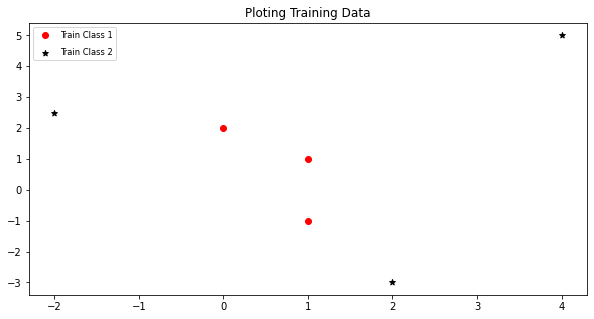

In [11]:
fig,ax = matplot.subplots()
ax.set_title('Ploting Training Data')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
matplot.show()

### Task-3:  Contour Plotting

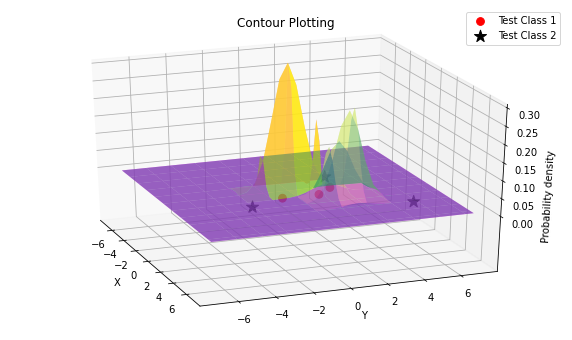

In [87]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# print(X)

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

Z1 = multivariate_gaussian(pos, mu1, sigma1)
# print(mu.shape[0])
Z2 = multivariate_gaussian(pos, mu2, sigma2)
# Create a surface plot and projected filled contour plot under it.
fig = matplot.figure()
ax = fig.gca(projection='3d')

ax.scatter(class1[:,0], class1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
ax.scatter(class2[:,0], class2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)
ax.legend()

fig.set_figheight(6)
fig.set_figwidth(10)


ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
ax.set_title('Contour Plotting')

ax.set_zlim(-0.15,0.3)
ax.set_zticks(np.linspace(0.30,0,7))
ax.view_init(27, -21)
matplot.show()

### Task-4:  Drawing Decision Boundary

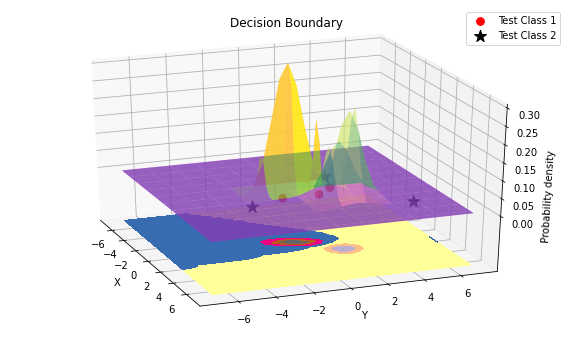

In [86]:
fig = matplot.figure()
ax = fig.gca(projection='3d')

ax.scatter(class1[:,0], class1[:,1], marker='o', c='red',s=60,label='Test Class 1',alpha= 1.0)
ax.scatter(class2[:,0], class2[:,1], marker='*', c='black',s=160,label='Test Class 2',alpha= 1.0)
ax.legend()

fig.set_figheight(6)
fig.set_figwidth(10)

ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.spring,alpha=.7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.summer,alpha=.4)

db=Z1-Z2 #decision boundary
ax.contourf(X, Y, db, zdir='z', offset=-0.15, cmap=cm.Accent)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
ax.set_title('Decision Boundary')
ax.set_zlim(-0.15,0.3)
ax.set_zticks(np.linspace(0.30,0,7))
ax.view_init(27, -21)
matplot.show()